In [ ]:
https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
    
https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks
    
https://jhui.github.io/2017/03/16/CNN-Convolutional-neural-network/

https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c

In [2]:
from tensorflow.keras.models import load_model
from vis.utils import utils

In [4]:
import numpy as np
import pickle
from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.optimizers import RMSprop
# from metrics import f1_m
# from models_og import create_classifier
# from models import create_classifier
from imblearn.over_sampling import RandomOverSampler

try:
    from tensorflow.keras import backend as K
except:
    pass

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [5]:
key = 'location_final1'
l = 0
q = 0.90
m='CNN'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_200' % (key, m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 42, 32)        1568      
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 42, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 41, 16)        2064      
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 41, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 20, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 19, 16)        1040      
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 19, 16)        6

### Visualize Filter

In [27]:
filters, biases = model.layers[0].get_weights()

In [28]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [24]:
import matplotlib.pyplot as plt

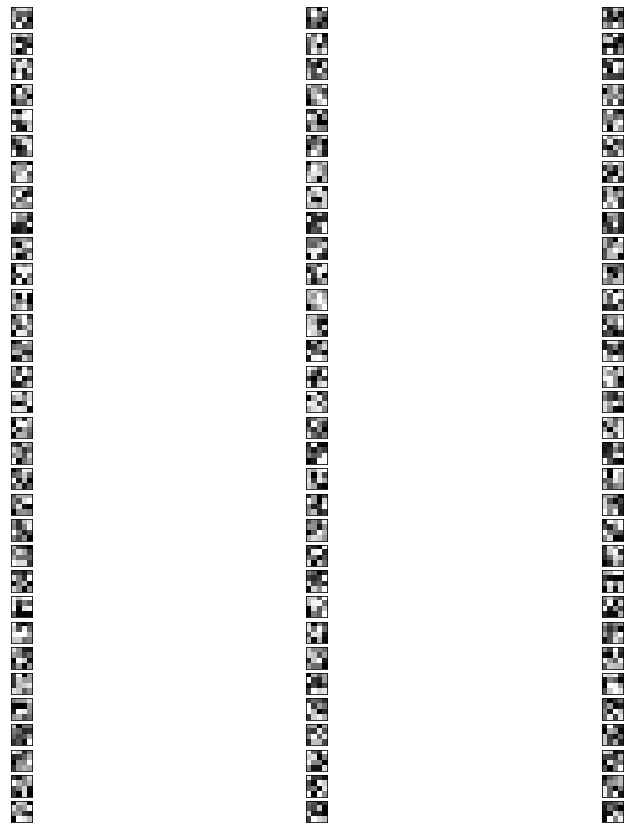

In [37]:
plt.rcParams['figure.figsize'] = [15, 15]

n_filters, ix = 32, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()

In [39]:
filters, biases = model.layers[2].get_weights()

In [41]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

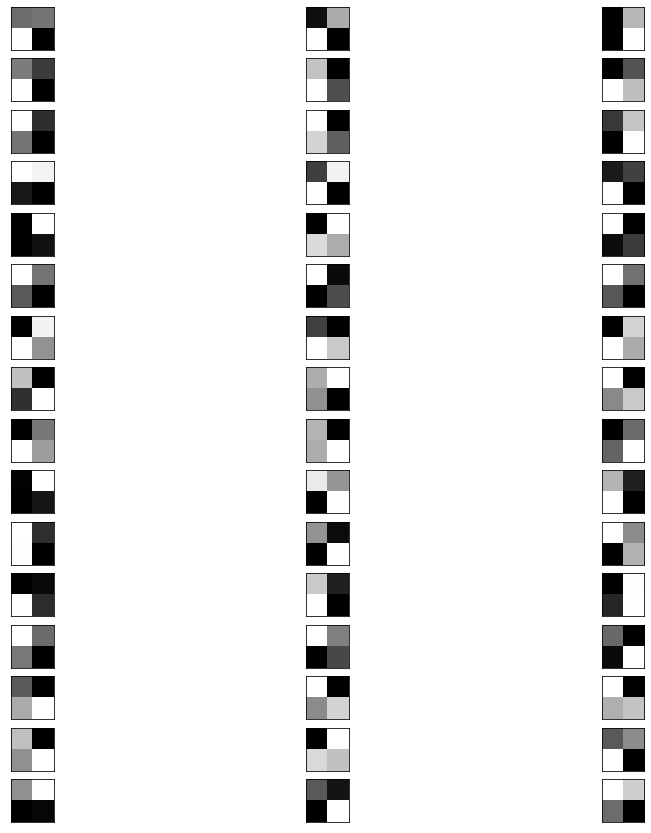

In [43]:
plt.rcParams['figure.figsize'] = [15, 15]

n_filters, ix = 16, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()

### Visualize Feature Map

D=0 Q=95 PPP 2016-01-29
D=0 Q=95 PNP 2014-12-13
D=0 Q=95 NPN 2012-01-18
D=0 Q=95 PPN 2017-03-21

FROM DRAFT

D=5 Q=95 PPN December 8, 2019

In [ ]:
img_path='\\dogs-vs-cats\\test1\\137.jpg' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )